#### | Finance & Risk Analytics - Milestone 1 |

#### Problem Statement

     Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

    A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

    Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Net worth of the company in the following year (2016) is provided which can be used to drive the labeled field.

    The data can be found in the following file:  Company_Data2015-1.xlsx 
    Explanation of data fields available in: 'Credit Default Data Dictionary.xlsx'

#### Importing Libraries

In [121]:
# Basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [122]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Importing Dataset

In [123]:
df=pd.read_excel('Company_Data2015-1.xlsx')

In [124]:
df.head(2)

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.0,0.00,0.02,0.00,0.00,0.00,0.0,-0.20,0.0,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.0,6.61,0.08,0.25,804.44,10.35,0.3,-0.84,-10.3,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24


#### Dropping Irrevalent Features

In [125]:
df = df.drop(['Co_Name','Co_Code'], axis=1)

#### Basic Statistics

In [126]:
df.shape

(3586, 65)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 65 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Networth Next Year                   3586 non-null   float64
 1   Equity Paid Up                       3586 non-null   float64
 2   Networth                             3586 non-null   float64
 3   Capital Employed                     3586 non-null   float64
 4   Total Debt                           3586 non-null   float64
 5   Gross Block                          3586 non-null   float64
 6   Net Working Capital                  3586 non-null   float64
 7   Current Assets                       3586 non-null   float64
 8   Current Liabilities and Provisions   3586 non-null   float64
 9   Total Assets/Liabilities             3586 non-null   float64
 10  Gross Sales                          3586 non-null   float64
 11  Net Sales                     

In [128]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Networth Next Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity Paid Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
Total Debt,3586.0,1994.823779,23652.842746,-0.72,0.0300,7.490,72.3500,652823.81
Gross Block,3586.0,594.178829,4871.547802,-41.19,0.5700,15.870,131.8950,128477.59
Net Working Capital,3586.0,410.809665,6301.218546,-13162.42,0.9425,10.145,61.1750,223257.56
Current Assets,3586.0,1960.349172,22577.570829,-0.91,4.0000,24.540,135.2775,721166.00
Current Liabilities and Provisions,3586.0,391.992078,2675.001631,-0.23,0.7325,9.225,65.6500,83232.98
Total Assets/Liabilities,3586.0,1778.453751,11437.574690,-4.51,10.5550,52.010,310.5400,254737.22


#### Missing Value Check

In [129]:
df.isnull().sum()

Networth Next Year                       0
Equity Paid Up                           0
Networth                                 0
Capital Employed                         0
Total Debt                               0
Gross Block                              0
Net Working Capital                      0
Current Assets                           0
Current Liabilities and Provisions       0
Total Assets/Liabilities                 0
Gross Sales                              0
Net Sales                                0
Other Income                             0
Value Of Output                          0
Cost of Production                       0
Selling Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted PAT                             0
CP                                       0
Revenue ear

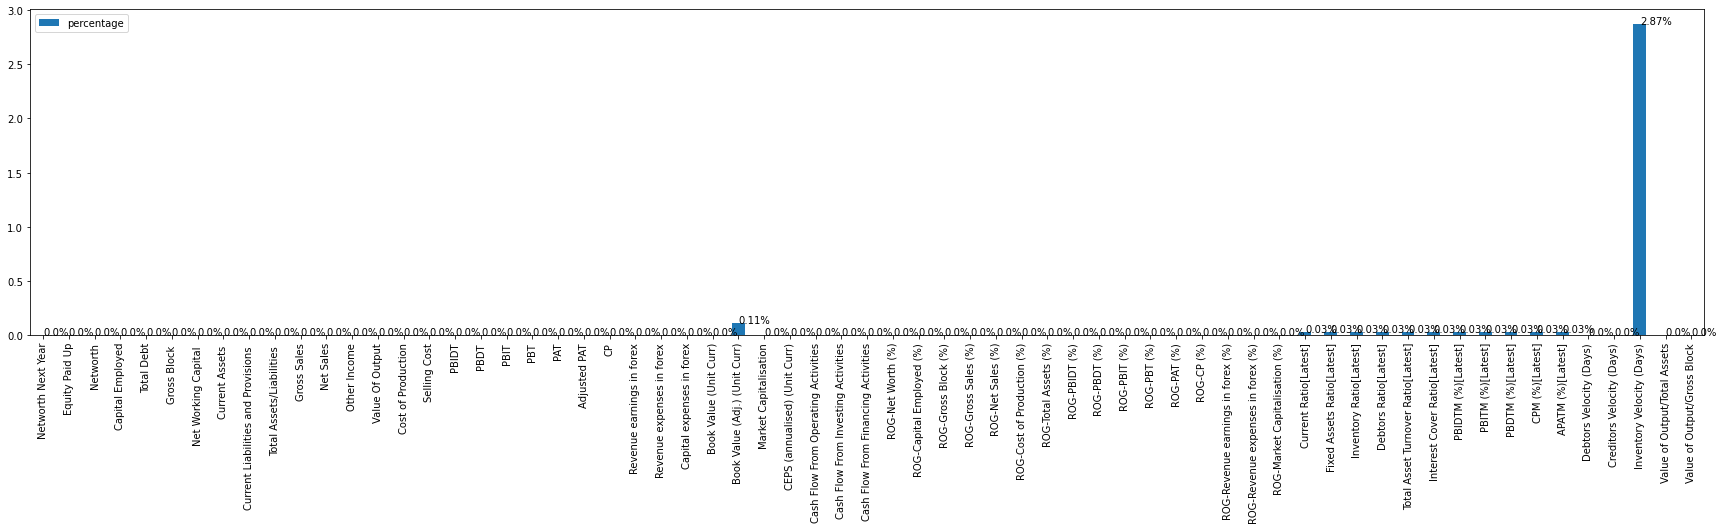

In [130]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,6))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

#### Missing Value Treatment

In [131]:
df['Current Ratio[Latest]'] = df['Current Ratio[Latest]'].fillna(df['Current Ratio[Latest]'].median())
df['Fixed Assets Ratio[Latest]'] = df['Fixed Assets Ratio[Latest]'].fillna(df['Fixed Assets Ratio[Latest]'].median())
df['Inventory Ratio[Latest]'] = df['Inventory Ratio[Latest]'].fillna(df['Inventory Ratio[Latest]'].median())
df['Debtors Ratio[Latest]'] = df['Debtors Ratio[Latest]'].fillna(df['Debtors Ratio[Latest]'].median())
df['Total Asset Turnover Ratio[Latest]'] = df['Total Asset Turnover Ratio[Latest]'].fillna(df['Total Asset Turnover Ratio[Latest]'].median())
df['Interest Cover Ratio[Latest]'] = df['Interest Cover Ratio[Latest]'].fillna(df['Interest Cover Ratio[Latest]'].median())
df['PBIDTM (%)[Latest]'] = df['PBIDTM (%)[Latest]'].fillna(df['PBIDTM (%)[Latest]'].median())
df['PBITM (%)[Latest]'] = df['PBITM (%)[Latest]'].fillna(df['PBITM (%)[Latest]'].median())
df['PBDTM (%)[Latest]'] = df['PBDTM (%)[Latest]'].fillna(df['PBDTM (%)[Latest]'].median())
df['CPM (%)[Latest]'] = df['CPM (%)[Latest]'].fillna(df['CPM (%)[Latest]'].median())
df['APATM (%)[Latest]'] = df['APATM (%)[Latest]'].fillna(df['APATM (%)[Latest]'].median())
df['Inventory Velocity (Days)'] = df['Inventory Velocity (Days)'].fillna(df['Inventory Velocity (Days)'].median())
df['Book Value (Adj.) (Unit Curr)'] = df['Book Value (Adj.) (Unit Curr)'].fillna(df['Book Value (Adj.) (Unit Curr)'].median())

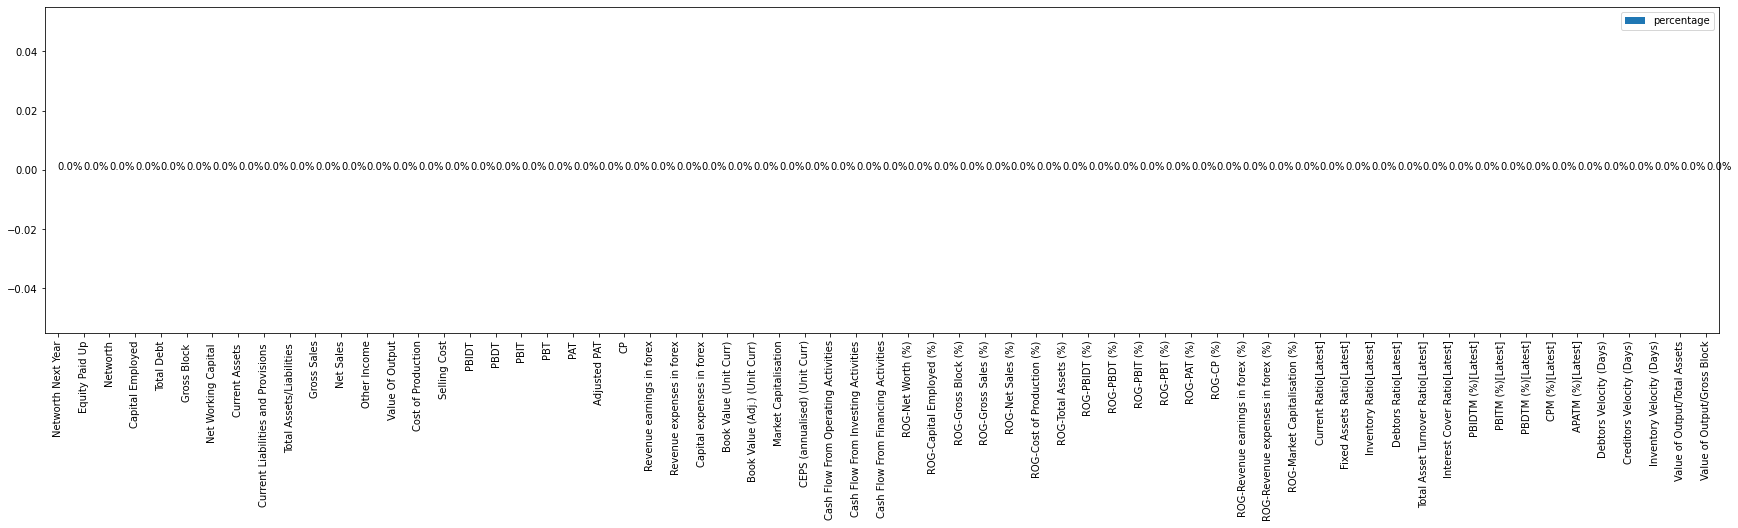

In [132]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,6))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

#### Duplicate Check

In [133]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block


#### Outlier Check

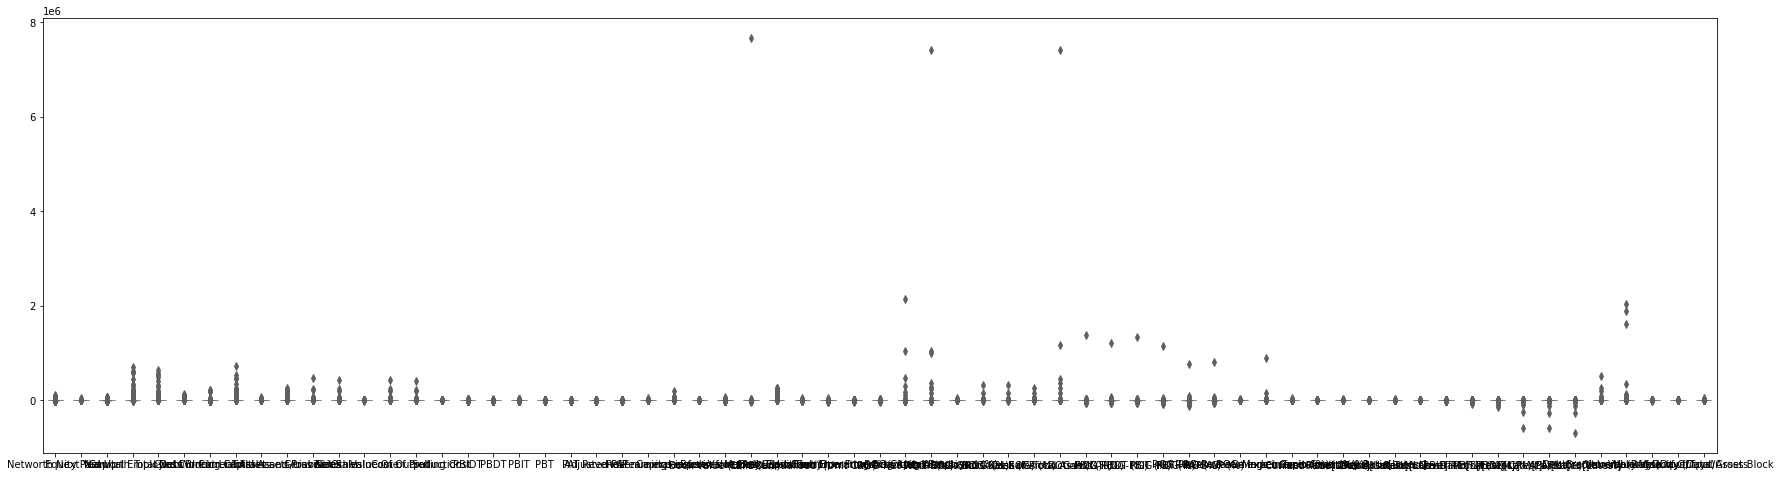

In [134]:
f, ax = plt.subplots(figsize=(30,8))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='v',linewidth=0.5)

#### Outlier Treatment

In [135]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [136]:
for feature in df[['Networth Next Year', 'Equity Paid Up', 'Networth',
       'Capital Employed', 'Total Debt', 'Gross Block ',
       'Net Working Capital ', 'Current Assets ',
       'Current Liabilities and Provisions ', 'Total Assets/Liabilities ',
       'Gross Sales', 'Net Sales', 'Other Income', 'Value Of Output',
       'Cost of Production', 'Selling Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted PAT', 'CP', 'Revenue earnings in forex',
       'Revenue expenses in forex', 'Capital expenses in forex',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)',
       'Market Capitalisation', 'CEPS (annualised) (Unit Curr)',
       'Cash Flow From Operating Activities',
       'Cash Flow From Investing Activities',
       'Cash Flow From Financing Activities', 'ROG-Net Worth (%)',
       'ROG-Capital Employed (%)', 'ROG-Gross Block (%)',
       'ROG-Gross Sales (%)', 'ROG-Net Sales (%)',
       'ROG-Cost of Production (%)', 'ROG-Total Assets (%)', 'ROG-PBIDT (%)',
       'ROG-PBDT (%)', 'ROG-PBIT (%)', 'ROG-PBT (%)', 'ROG-PAT (%)',
       'ROG-CP (%)', 'ROG-Revenue earnings in forex (%)',
       'ROG-Revenue expenses in forex (%)', 'ROG-Market Capitalisation (%)',
       'Current Ratio[Latest]', 'Fixed Assets Ratio[Latest]',
       'Inventory Ratio[Latest]', 'Debtors Ratio[Latest]',
       'Total Asset Turnover Ratio[Latest]', 'Interest Cover Ratio[Latest]',
       'PBIDTM (%)[Latest]', 'PBITM (%)[Latest]', 'PBDTM (%)[Latest]',
       'CPM (%)[Latest]', 'APATM (%)[Latest]', 'Debtors Velocity (Days)',
       'Creditors Velocity (Days)', 'Inventory Velocity (Days)',
       'Value of Output/Total Assets', 'Value of Output/Gross Block']]:
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature]) 

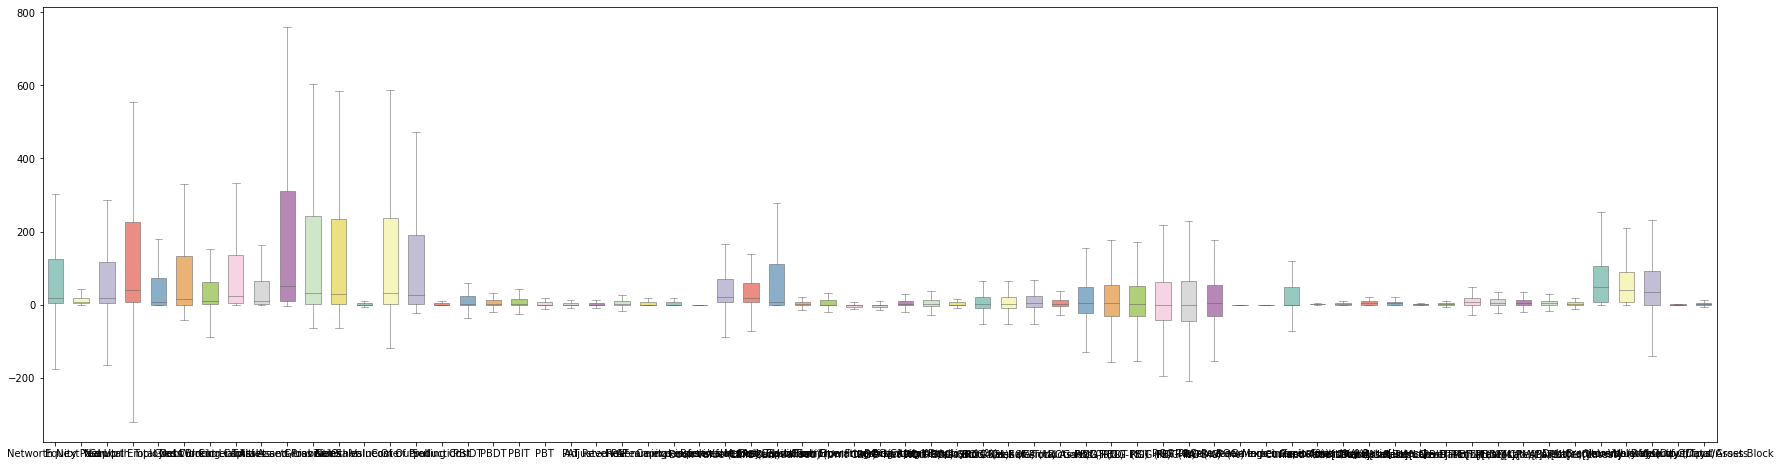

In [137]:
f, ax = plt.subplots(figsize=(30,8))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='v',linewidth=0.5)

#### Binning With Histogram & Univariate Analysis

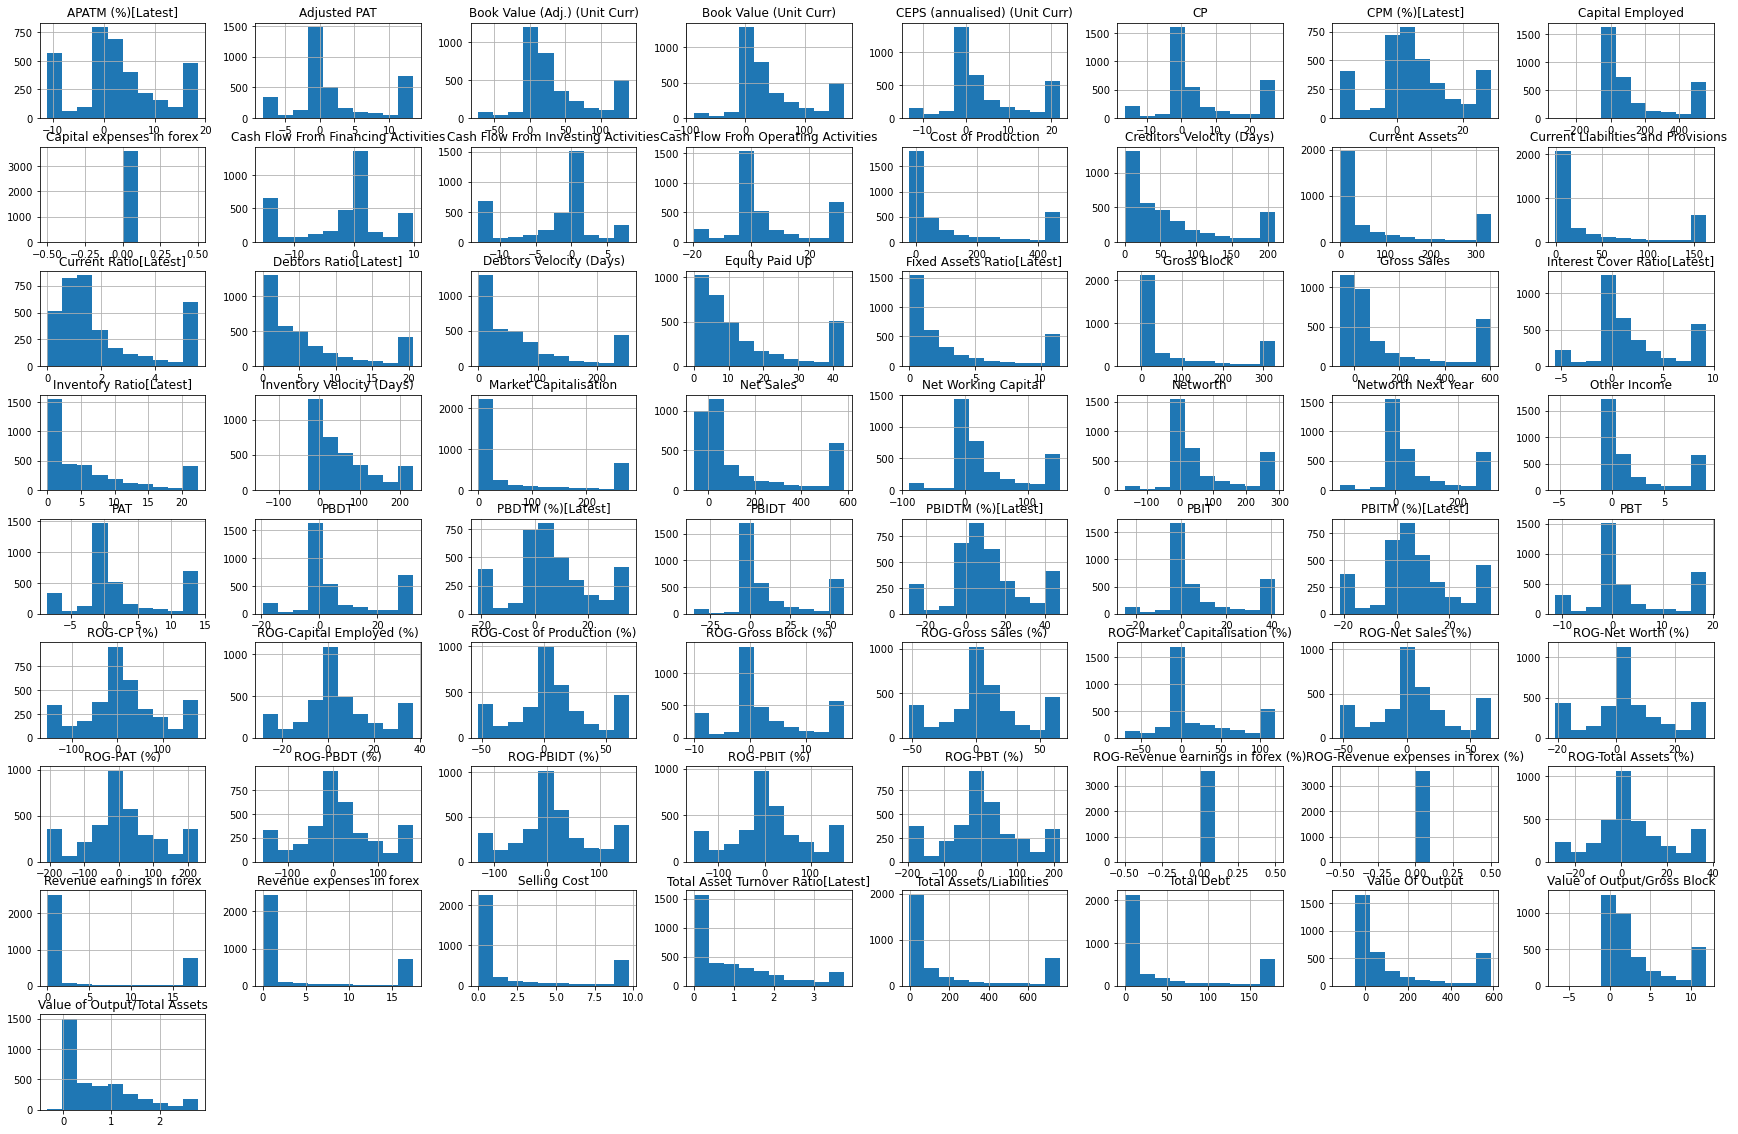

In [138]:
df.hist(bins=10, figsize=(30,20))
plt.show()

#### Bi-Variate Analysis

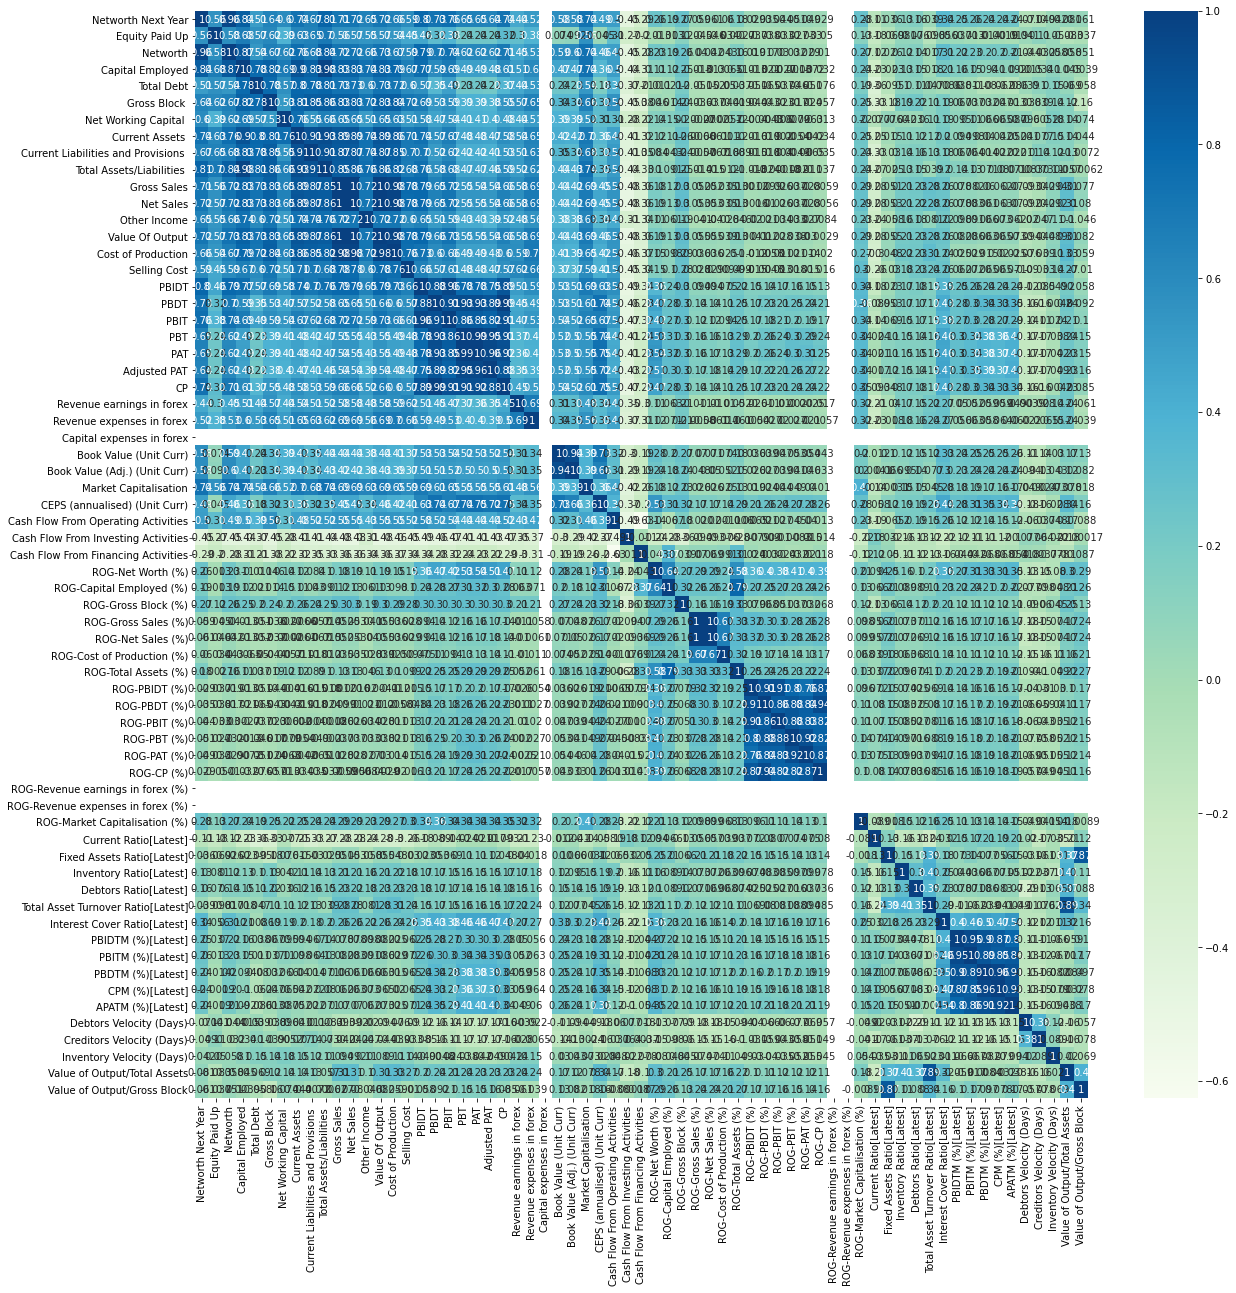

In [139]:
f, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(df.corr(), cmap = 'GnBu', annot = True)

#### Creation of Target Variable

In [140]:
target=[]
for i in range(len(df)):
    if(df["Networth Next Year"][i]<0):
        target.append("1")   
    else :
        (df["Networth Next Year"][i]>=0) 
        target.append("0")

In [141]:
target=pd.DataFrame(target)
df_new=pd.concat([target],axis=1)
df_new.columns=["Target"]
df_new.head()

,Target
0,1
1,1
2,1
3,1
4,1


In [142]:
df=pd.concat([df,df_new],axis=1) 
df.head(2)

,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,Target
0,-175.74125,43.16875,-166.215,-320.90125,180.83,328.8825,-89.40625,40.50000,163.02625,109.6000,0.00000,0.00,7.6000,-0.070,137.670,0.00000,-35.1875,-19.4175,-25.00125,-11.28375,-8.46,-8.23875,-16.365,0.00,0.00000,0.0,-87.595,-72.2775,0.00000,-13.15875,-19.74,1.46000,9.915,-15.3100,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.430,-19.33,-19.33,-19.29,0.0,0.0,0.00,0.02,0.00,0.00000,0.00,0.0,-0.20,0.0,0.0000,0.00,0.00000,0.00000,0.0,0.0,45.0,0.00,0.00,1
1,-175.74125,43.16875,-166.215,555.10875,180.83,328.8825,-89.40625,332.19375,163.02625,760.5175,603.46125,583.94,9.0575,587.475,472.465,9.70625,58.7525,-4.3200,35.53000,-11.28375,-8.46,-8.23875,-4.320,6.35,17.46875,0.0,-15.180,-15.1800,278.64375,-0.02000,32.08,-12.97375,9.915,-20.7625,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,172.385,-9.85,-9.85,-108.77,0.0,0.0,6.61,0.08,0.25,22.34375,10.35,0.3,-0.84,-10.3,-21.4275,-21.15,-17.08125,-11.11125,29.0,101.0,2.0,0.31,0.24,1


In [143]:
df['Target'].value_counts()

0    3199
1     387
Name: Target, dtype: int64

#### Extracting the target column into separate vectors for training set and test set¶

In [144]:
X = df.drop("Target" , axis=1)
y = df.pop("Target")

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.33, random_state=42)

In [146]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2402, 65)
X_test (1184, 65)
train_labels (2402,)
test_labels (1184,)


#### Checking Multicollinearity & VIF

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns

In [149]:
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

C:\Users\Swati Banerjee\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


                                feature          VIF
0                    Networth Next Year    20.039001
1                        Equity Paid Up     4.736924
2                              Networth    26.518532
3                      Capital Employed    64.211820
4                            Total Debt     7.481716
5                          Gross Block     12.005598
6                  Net Working Capital      5.002809
7                       Current Assets     29.900865
8   Current Liabilities and Provisions     22.495850
9             Total Assets/Liabilities     88.913688
10                          Gross Sales  1330.418008
11                            Net Sales  1908.992004
12                         Other Income     4.362791
13                      Value Of Output   566.655122
14                   Cost of Production    45.904718
15                         Selling Cost     4.646620
16                                PBIDT    35.121175
17                                 PBDT   127.

#### Dropping Variables having VIF>5

In [150]:
X_train = X_train.drop(["Gross Sales","Net Sales",'ROG-Gross Sales (%)',
             "PBDT",'CP','ROG-Revenue earnings in forex (%)','ROG-Revenue expenses in forex (%)',
             'Capital Employed','Value Of Output','Gross Block ',
             'Cost of Production','PBIDT','PBIT','PBT','PAT','PBIDTM (%)[Latest]','PBITM (%)[Latest]',
             'PBDTM (%)[Latest]','CPM (%)[Latest]','APATM (%)[Latest]',
             'ROG-PBIDT (%)','ROG-PBDT (%)','ROG-PBIT (%)' ,'ROG-PBT (%)' ,'ROG-PAT (%)','ROG-CP (%)',
             'Networth Next Year','Networth','Book Value (Unit Curr)','Book Value (Adj.) (Unit Curr)',
             'Capital expenses in forex','Total Asset Turnover Ratio[Latest]','Value of Output/Total Assets',
             'Current Assets ','Current Liabilities and Provisions ','Total Assets/Liabilities ',
             'Value of Output/Gross Block'], axis=1)

In [151]:
X_test = X_test.drop(["Gross Sales","Net Sales",'ROG-Gross Sales (%)',
             "PBDT",'CP','ROG-Revenue earnings in forex (%)','ROG-Revenue expenses in forex (%)',
             'Capital Employed','Value Of Output','Gross Block ',
             'Cost of Production','PBIDT','PBIT','PBT','PAT','PBIDTM (%)[Latest]','PBITM (%)[Latest]',
             'PBDTM (%)[Latest]','CPM (%)[Latest]','APATM (%)[Latest]',
             'ROG-PBIDT (%)','ROG-PBDT (%)','ROG-PBIT (%)' ,'ROG-PBT (%)' ,'ROG-PAT (%)','ROG-CP (%)',
             'Networth Next Year','Networth','Book Value (Unit Curr)','Book Value (Adj.) (Unit Curr)',
             'Capital expenses in forex','Total Asset Turnover Ratio[Latest]','Value of Output/Total Assets',
             'Current Assets ','Current Liabilities and Provisions ','Total Assets/Liabilities ',
             'Value of Output/Gross Block'], axis=1)

In [152]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (2402, 28)
X_test (1184, 28)


#### Logistic Regression - StatModels

In [153]:
import statsmodels.api as sm

##### Iteration - 1

In [154]:
# Logistic regression model
col = X_train.columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.Logit(train_labels.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.187221
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           28
Date:                Sun, 12 Sep 2021   Pseudo R-squ.:                  0.4317
Time:                        21:15:03   Log-Likelihood:                -449.71
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                6.135e-126
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4524      0.202     -2.240      0.025      -0.848      -0.057
Equity Paid Up                         -0.0057      0.009     -0.629      0.529      -0.024       0.012
Total Debt                              0.0107      0.002      4.428      0.000       0.006       0.015
Net Working Capital                    -0.0123      0.002     -5.406      0.000      -0.017      -0.008
Other Income                            0.0651      0.041      1.583      0.113      -0.015       0.146
Selling Cost                            0.0394      0.048      0.830      0.407      -0.054       0.133
Adjusted PAT                            0.0085      0.030      0.282      0.778      -0.050       0.067
Revenue earnings in forex              -0.0142      0.020     -0.704      0.481      -0.054       0.025
Revenue expenses in forex               0.0358      0.022      1.650      0.099      -0.007       0.078
Market Capitalisation                  -0.0112      0.002     -5.710      0.000      -0.015      -0.007
CEPS (annualised) (Unit Curr)          -0.0979      0.022     -4.456      0.000      -0.141      -0.055
Cash Flow From Operating Activities    -0.0199      0.013     -1.553      0.120      -0.045       0.005
Cash Flow From Investing Activities     0.0059      0.026      0.230      0.818      -0.044       0.056
Cash Flow From Financing Activities     0.0054      0.022      0.242      0.809      -0.038       0.049
ROG-Net Worth (%)                      -0.0178      0.009     -1.942      0.052      -0.036       0.000
ROG-Capital Employed (%)                0.0123      0.008      1.457      0.145      -0.004       0.029
ROG-Gross Block (%)                    -0.0421      0.015     -2.716      0.007      -0.072      -0.012
ROG-Net Sales (%)                      -0.0036      0.004     -1.008      0.313      -0.011       0.003
ROG-Cost of Production (%)             -0.0012      0.003     -0.350      0.727      -0.008       0.005
ROG-Total Assets (%)                   -0.0222      0.009     -2.520      0.012      -0.040      -0.005
ROG-Market Capitalisation (%)           0.0015      0.002      0.694      0.488      -0.003       0.006
Current Ratio[Latest]                  -0.5907      0.079     -7.445      0.000      -0.746      -0.435
Fixed Assets Ratio[Latest]             -0.0696      0.034     -2.039      0.041      -0.137      -0.003
Inventory Ratio[Latest]                -0.0066      0.014     -0.457      0.647      -0.035       0.022
Debtors Ratio[Latest]                  -0.0594      0.018     -3.352      0.001      -0.094      -0.025
Interest Cover Ratio[Latest]           -0.1255      0.032     -3.869      0.000      -0.189      -0.062
Debtors Velocity (Days)                -0.0033      0.001     -2.957      0.003      -0.006      -0.001
Creditors Velocity (Days)               0.0031      0.001      2.627      0.009       0.001       0.005
Inventory Velocit

    Dropping the features having 'p-value' > 0.05

In [155]:
X_train = X_train.drop(['Inventory Velocity (Days)','Equity Paid Up','Selling Cost','Adjusted PAT',
                       'Revenue earnings in forex','Cash Flow From Operating Activities','ROG-Capital Employed (%)',
                       'ROG-Net Sales (%)','ROG-Cost of Production (%)','Inventory Ratio[Latest]',
                       'Other Income','Cash Flow From Investing Activities','ROG-Net Worth (%)',
                       'ROG-Market Capitalisation (%)','Revenue expenses in forex'],axis=1)

##### Iterations - 2

In [156]:
# Logistic regression model
col = X_train.columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.Logit(train_labels.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.191503
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                           13
Date:                Sun, 12 Sep 2021   Pseudo R-squ.:                  0.4187
Time:                        21:15:04   Log-Likelihood:                -459.99
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.202e-133
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.4803      0.180     -2.669      0.008      -0.833      -0.128
Total Debt                              0.0113      0.002      5.900      0.000       0.008       0.015
Net Working Capital                    -0.0099      0.002     -4.784      0.000      -0.014      -0.006
Market Capitalisation                  -0.0093      0.002     -5.808      0.000      -0.012      -0.006
CEPS (annualised) (Unit Curr)          -0.1081      0.017     -6.495      0.000      -0.141      -0.075
Cash Flow From Financing Activities     0.0325      0.014      2.346      0.019       0.005       0.060
ROG-Gross Block (%)                    -0.0427      0.015     -2.873      0.004      -0.072      -0.014
ROG-Total Assets (%)                   -0.0207      0.006     -3.294      0.001      -0.033      -0.008
Current Ratio[Latest]                  -0.6017      0.079     -7.619      0.000      -0.756      -0.447
Fixed Assets Ratio[Latest]             -0.0769      0.032     -2.396      0.017      -0.140      -0.014
Debtors Ratio[Latest]                  -0.0526      0.016     -3.394      0.001      -0.083      -0.022
Interest Cover Ratio[Latest]           -0.1209      0.032     -3.835      0.000      -0.183      -0.059
Debtors Velocity (Days)                -0.0035      0.001     -3.281      0.001      -0.006      -0.001
Creditors Velocity (Days)               0.0032      0.001      2.720      0.007       0.001       0.005
=======================================================================================================
"""

#### Update of Test Dataset based on final Training dataset

In [157]:
X_test = X_test.drop(['Inventory Velocity (Days)','Equity Paid Up','Selling Cost','Adjusted PAT',
                       'Revenue earnings in forex','Cash Flow From Operating Activities','ROG-Capital Employed (%)',
                       'ROG-Net Sales (%)','ROG-Cost of Production (%)','Inventory Ratio[Latest]',
                       'Other Income','Cash Flow From Investing Activities','ROG-Net Worth (%)',
                       'ROG-Market Capitalisation (%)','Revenue expenses in forex'],axis=1)

#### Univariate Analysis Diagram (based on significant features)

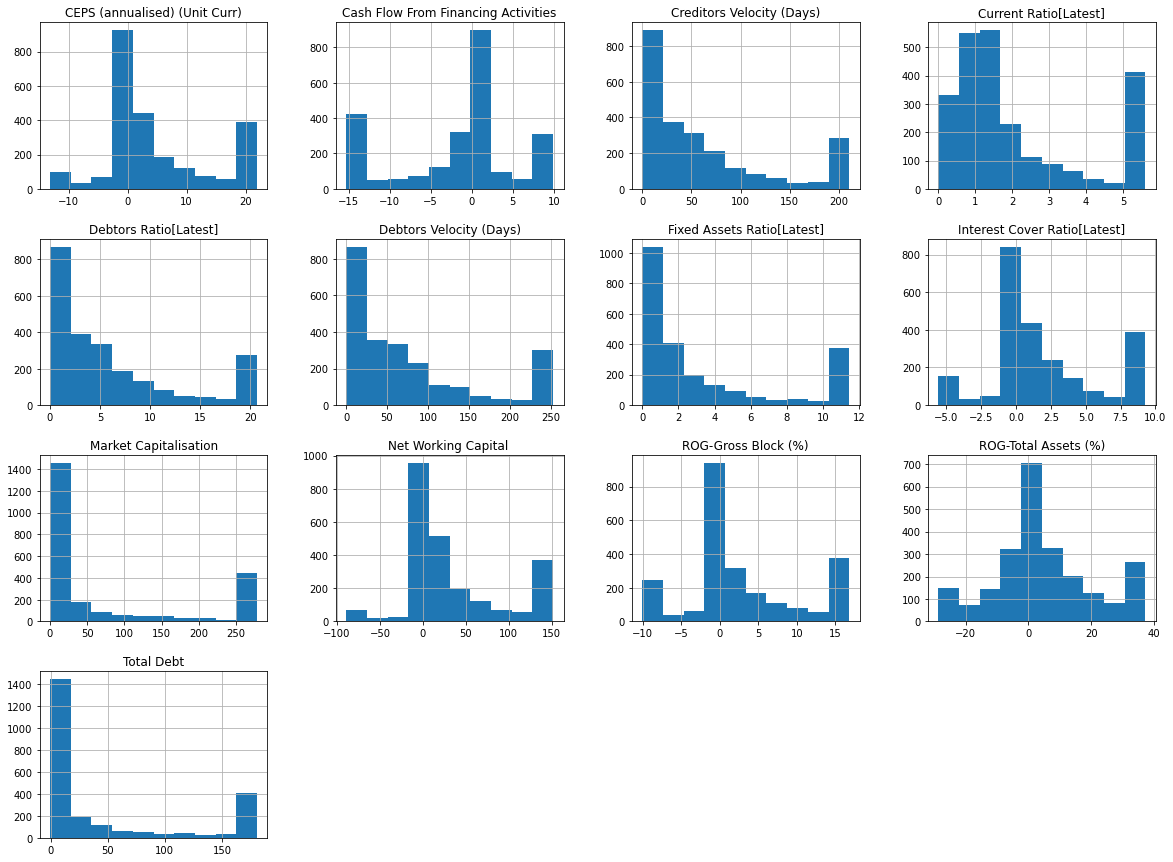

In [158]:
X_train.hist(bins=10, figsize=(20,15))
plt.show()

#### Bivariate Analysis Diagram (based on significant features)

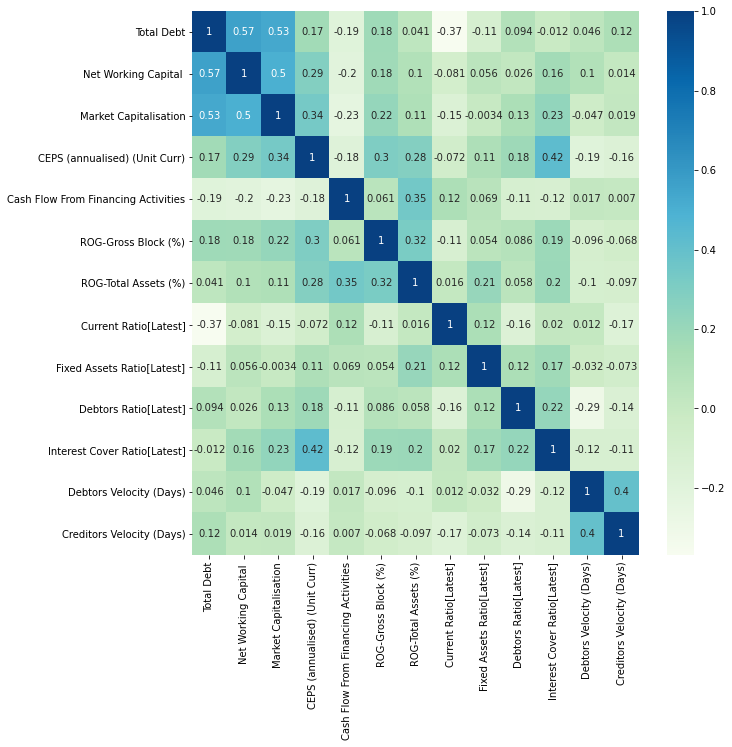

In [159]:
f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(X_train.corr(), cmap = 'GnBu', annot = True)

#### Logistic Regression - "Sklearn"

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [161]:
model = LogisticRegression(C=1.0, 
                           class_weight=None, 
                           dual=False, 
                           fit_intercept=True,
                           intercept_scaling=1, 
                           l1_ratio=None, 
                           max_iter=100,
                           n_jobs=None, 
                           penalty='l2',
                           random_state=42, 
                           solver='liblinear', 
                           tol=0.0001, 
                           verbose=0,
                           warm_start=False)
model.fit(X_train, train_labels) 

LogisticRegression(random_state=42, solver='liblinear')

In [162]:
y_predict_train = model.predict(X_train)
log_train_acc = model.score(X_train, train_labels)
log_train_acc

0.9229808492922564

In [163]:
y_predict_test = model.predict(X_test)
log_test_acc = model.score(X_test, test_labels)
log_test_acc

0.9180743243243243

In [164]:
model.intercept_

array([-0.46393182])

In [165]:
model.coef_

array([[ 0.01128702, -0.00991708, -0.0092628 , -0.10829857,  0.03248399,
        -0.04270085, -0.02066835, -0.60195088, -0.07745756, -0.05328912,
        -0.12059641, -0.00357678,  0.00313394]])

#### Performance Matrix

In [166]:
confusion_matrix(train_labels, y_predict_train)

array([[2118,   39],
       [ 146,   99]], dtype=int64)

In [167]:
print(classification_report(train_labels, y_predict_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2157
           1       0.72      0.40      0.52       245

    accuracy                           0.92      2402
   macro avg       0.83      0.69      0.74      2402
weighted avg       0.91      0.92      0.91      2402



In [168]:
confusion_matrix(test_labels, y_predict_test)

array([[1020,   22],
       [  75,   67]], dtype=int64)

In [169]:
print(classification_report(test_labels, y_predict_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1042
           1       0.75      0.47      0.58       142

    accuracy                           0.92      1184
   macro avg       0.84      0.73      0.77      1184
weighted avg       0.91      0.92      0.91      1184



#### ROC Curve

AUC: 0.918


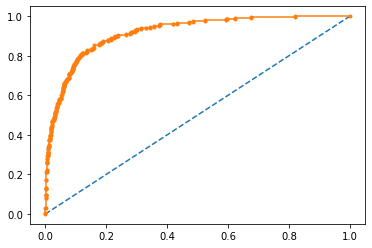

In [170]:
probs = model.predict_proba(X_train)
probs = probs[:, 1]
#**************************************************#
# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % log_train_auc)
#**************************************************#
# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(train_labels, probs, pos_label='1')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_train_fpr, log_train_tpr, marker='.')
plt.show()

AUC: 0.918


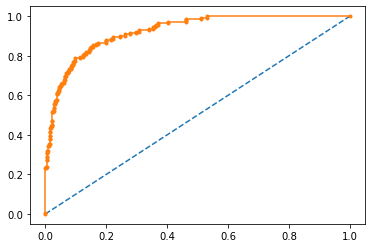

In [171]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
#**************************************************#
# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % log_train_auc)
#**************************************************#
# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(test_labels, probs, pos_label='1')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(log_test_fpr, log_test_tpr, marker='.')
plt.show()

#### Optimal Cutoff Point

    The optimal cut off would be where tpr is high and fpr is low | tpr - (1-fpr) is zero or near to zero is the optimal cut off point

In [172]:
i = np.arange(len(log_train_tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(log_train_fpr, index=i),
                    'tpr' : pd.Series(log_train_tpr, index = i), 
                    '1-fpr' : pd.Series(1-log_train_fpr, index = i), 
                    'tf' : pd.Series(log_train_tpr - (1-log_train_fpr), index = i), 
                    'thresholds' : pd.Series(train_thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
211,0.160872,0.840816,0.839128,0.001688,0.106464


Text(0.5, 1.0, 'Receiver operating characteristic')

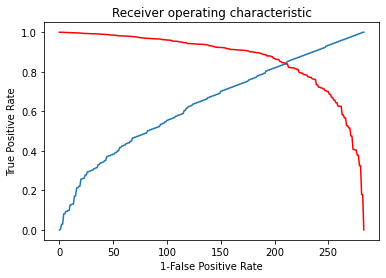

In [173]:
# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

In [174]:
from numpy import sqrt
from numpy import argmax
gmeans = sqrt(log_train_tpr * (1-log_train_fpr))
yhat = model.predict_proba(X_train)
yhat = yhat[:, 1]
thresholds = yhat
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.227669, G-Mean=0.846
